In [14]:
from tensorflow.examples.tutorials.mnist import input_data

In [16]:
#Take a look! One hot encoding!
mnist = input_data.read_data_sets('./../datasets/mnist/', one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./../datasets/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./../datasets/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./../datasets/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./../datasets/mnist/t10k-labels-idx1-ubyte.gz


In [47]:
#train data
#data
X_train = mnist.train.images
#labels
y_train = mnist.train.labels

#test data: data and labesl
X_test = mnist.test.images
y_test = mnist.test.labels

# 55K objects (28x28 images) with 784 features (28x28 = 784)
X_train.shape

(55000, 784)

In [48]:
#first image
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [49]:

y_train.shape

(55000, 10)

In [50]:
#remember! y_train is in one hot encoding format!
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [51]:
#1K images for test
X_test.shape

(10000, 784)

Text(0.5, 1.0, 'Class: 3')

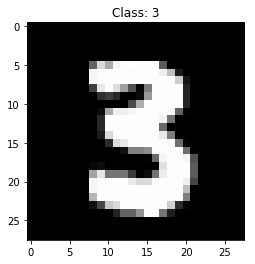

In [55]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.imshow(X_train[210].reshape((28,28)), cmap = 'gray')
plt.title('Class: ' + str(np.argmax(y_train[210])))

Text(0.5, 1.0, 'Class: 2')

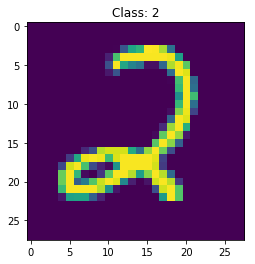

In [57]:
plt.imshow(X_train[209].reshape((28,28)))
plt.title('Class: ' + str(np.argmax(y_train[209])))

In [58]:
#batch-size: 128
X_batch, y_batch = mnist.train.next_batch(128)
X_batch.shape

(128, 784)

In [69]:
#Number of columns/attributes/features
X_train.shape[1] 

784

In [72]:
NUMBER_OF_CLASSES = y_train.shape[1]
NUMBER_OF_CLASSES

10

In [74]:
NUMBER_OF_FEATURES = X_train.shape[1]
NUMBER_OF_FEATURES

784

In [67]:
#Mounting the graph of tensors to NEURAL NETWORK
#The number of input neurons equals to the number of features in data!
number_neurons_input_layer = NUMBER_OF_FEATURES
number_neurons_input_layer

784

In [75]:
#Number of features / number of classes DIVIDED BY 2
number_neurons_hidden_layer_1 = int(( NUMBER_OF_FEATURES + NUMBER_OF_CLASSES ) / 2)
number_neurons_hidden_layer_1

397

In [76]:
number_neurons_hidden_layer_2 = number_neurons_hidden_layer_1
number_neurons_hidden_layer_3 = number_neurons_hidden_layer_1

number_neurons_exit_layer = NUMBER_OF_CLASSES
number_neurons_exit_layer

10

In [31]:
# Architecture of NEURAL NETWORK (in number of neurons)
"""
INPUT LAYER   | H I D D E N  L A Y E R  | EXIT LAYER
                 1st      2nd     3rd        
784   ->         397  ->  397 ->  397    ->  10

"""
import tensorflow as tf

In [77]:
#weights
W = {'hidden1': tf.Variable(tf.random_normal( [number_neurons_input_layer, number_neurons_hidden_layer_1] )),
     'hidden2': tf.Variable(tf.random_normal( [number_neurons_hidden_layer_1, number_neurons_hidden_layer_2] )),
     'hidden3': tf.Variable(tf.random_normal( [number_neurons_hidden_layer_2, number_neurons_hidden_layer_3] )),
     'exit': tf.Variable(tf.random_normal( [number_neurons_hidden_layer_3, number_neurons_exit_layer] )) 
}

In [78]:
#biases
b = {'hidden1': tf.Variable(tf.random_normal([number_neurons_hidden_layer_1])),
     'hidden2': tf.Variable(tf.random_normal([number_neurons_hidden_layer_2])),
     'hidden3': tf.Variable(tf.random_normal([number_neurons_hidden_layer_3])),
     'exit': tf.Variable(tf.random_normal([number_neurons_exit_layer]))   
}

In [79]:
#placehoders for data
xph = tf.placeholder('float', [None, number_neurons_input_layer])
yph = tf.placeholder('float', [None, number_neurons_exit_layer])

In [82]:
def mlp(x, W, bias):
    hidden_layer_1 = tf.nn.relu(tf.add(tf.matmul(x, W['hidden1']), bias['hidden1']))
    hidden_layer_2 = tf.nn.relu(tf.add(tf.matmul(hidden_layer_1, W['hidden2']), bias['hidden2']))
    hidden_layer_3 = tf.nn.relu(tf.add(tf.matmul(hidden_layer_2, W['hidden3']), bias['hidden3']))
    exit_layer = tf.add(tf.matmul(hidden_layer_3, W['exit']), bias['exit'])
    return exit_layer

In [83]:
model = mlp(xph, W, b)
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = model, labels = yph))
optimizer = tf.train.AdamOptimizer(learning_rate = 0.0001).minimize(error)

In [86]:
predictions = tf.nn.softmax(model)
correct_predictions = tf.equal(tf.argmax(predictions, 1), tf.argmax(yph, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [87]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(5000):
        
        #batch size: 128
        X_batch, y_batch = mnist.train.next_batch(128)
        
        _, cost = sess.run([optimizer, error], feed_dict = {xph: X_batch, yph: y_batch})
        
        if epoch % 100 == 0:
            acc = sess.run([accuracy], feed_dict = {xph: X_batch, yph: y_batch})
            print('Epoch: ' + str((epoch + 1)) + ' error: ' + str(cost) + ' acc: ' + str(acc))
            
    print('Trainning finished!')
    print(sess.run(accuracy, feed_dict = {xph: X_test, yph: y_test}))

Epoch: 1 error: 41974.04 acc: [0.1328125]
Epoch: 101 error: 17880.732 acc: [0.1875]
Epoch: 201 error: 8281.586 acc: [0.3671875]
Epoch: 301 error: 6556.708 acc: [0.4453125]
Epoch: 401 error: 4263.1416 acc: [0.5546875]
Epoch: 501 error: 3510.0024 acc: [0.6328125]
Epoch: 601 error: 2628.1436 acc: [0.625]
Epoch: 701 error: 2611.1362 acc: [0.703125]
Epoch: 801 error: 2880.927 acc: [0.65625]
Epoch: 901 error: 2176.797 acc: [0.796875]
Epoch: 1001 error: 2380.7793 acc: [0.7109375]
Epoch: 1101 error: 1864.9735 acc: [0.75]
Epoch: 1201 error: 2018.6472 acc: [0.765625]
Epoch: 1301 error: 1607.5393 acc: [0.796875]
Epoch: 1401 error: 1186.7479 acc: [0.8125]
Epoch: 1501 error: 1295.1389 acc: [0.796875]
Epoch: 1601 error: 1379.8314 acc: [0.8203125]
Epoch: 1701 error: 2012.8179 acc: [0.7578125]
Epoch: 1801 error: 1741.8384 acc: [0.8046875]
Epoch: 1901 error: 1428.704 acc: [0.8125]
Epoch: 2001 error: 1092.9143 acc: [0.859375]
Epoch: 2101 error: 944.3253 acc: [0.8984375]
Epoch: 2201 error: 1134.826 acc: 

In [88]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])